In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Concrete_Data_Yeh.csv')
df = data.copy()
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()

In [5]:
from sklearn.model_selection import train_test_split

In [38]:
xtr , xte , ytr, yte = train_test_split(df.drop(columns='csMPa') , df['csMPa'] , test_size=0.3 , random_state=10)
print(xtr.shape , xte.shape , ytr.shape , yte.shape)

(721, 8) (309, 8) (721,) (309,)


In [7]:
le.fit(xtr,ytr)

LinearRegression()

In [9]:
ypr = le.predict(xtr)

In [12]:
le.score(xtr,ytr)

0.6116061697092773

In [17]:
from sklearn.metrics import get_scorer_names

In [21]:
import statsmodels.api as sm

In [26]:
olsm = sm.OLS(ytr  , xtr).fit()

In [29]:
print(olsm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              1181.
Date:                Sat, 20 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:48:14   Log-Likelihood:                         -2716.1
No. Observations:                 721   AIC:                                      5448.
Df Residuals:                     713   BIC:                                      5485.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [33]:
xtr = sm.add_constant(xtr)

In [34]:
olsm = sm.OLS(ytr  , xtr).fit()

In [35]:
print(olsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          1.06e-140
Time:                        10:53:05   Log-Likelihood:                -2715.5
No. Observations:                 721   AIC:                             5449.
Df Residuals:                     712   BIC:                             5490.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.4219     32.286  

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [39]:
pt.fit(xtr)

PowerTransformer()

In [45]:
xtr = pt.transform(xtr)

In [46]:
le.fit(xtr , ytr)

LinearRegression()

In [47]:
le.score(xtr,ytr)

0.8047613444217804

In [49]:
le.score(xte,yte)

C:\Users\MAYUR\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-14962.664825411368

In [50]:
xte = pt.transform(xte)

In [51]:
le.score(xte,yte)

0.8089841082686244

## Polynomial Regression

In [78]:
dd = pd.DataFrame({"x":[1,-1,2,-2,3,-3] , "y":[2,2,5,5,10,10]})

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

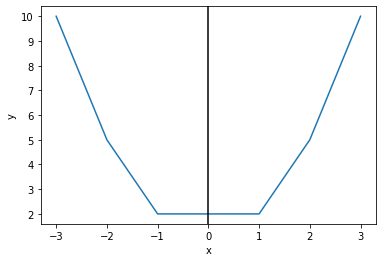

In [61]:
sns.lineplot(x=dd.x,y=dd.y)
plt.axvline(0,color='k')

In [79]:
dd = dd.sort_values(by='x')

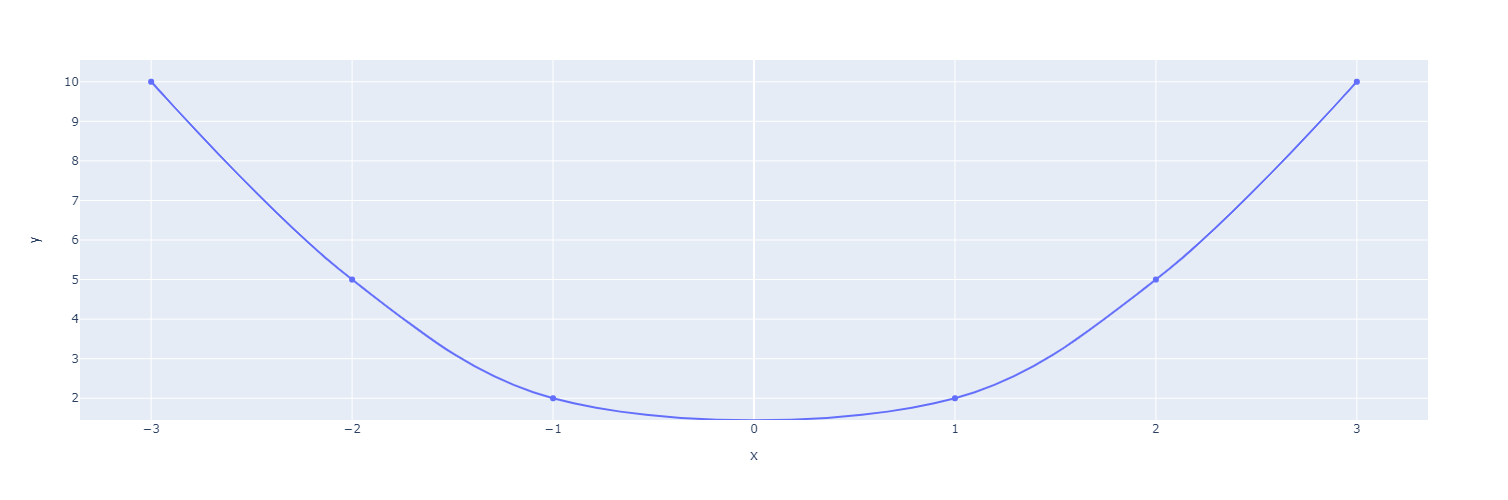

In [81]:
px.line(x=dd.x,y=dd.y,line_shape='spline',width=800,height=500,markers=True)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
poly = PolynomialFeatures()
ddt = poly.fit_transform(dd)

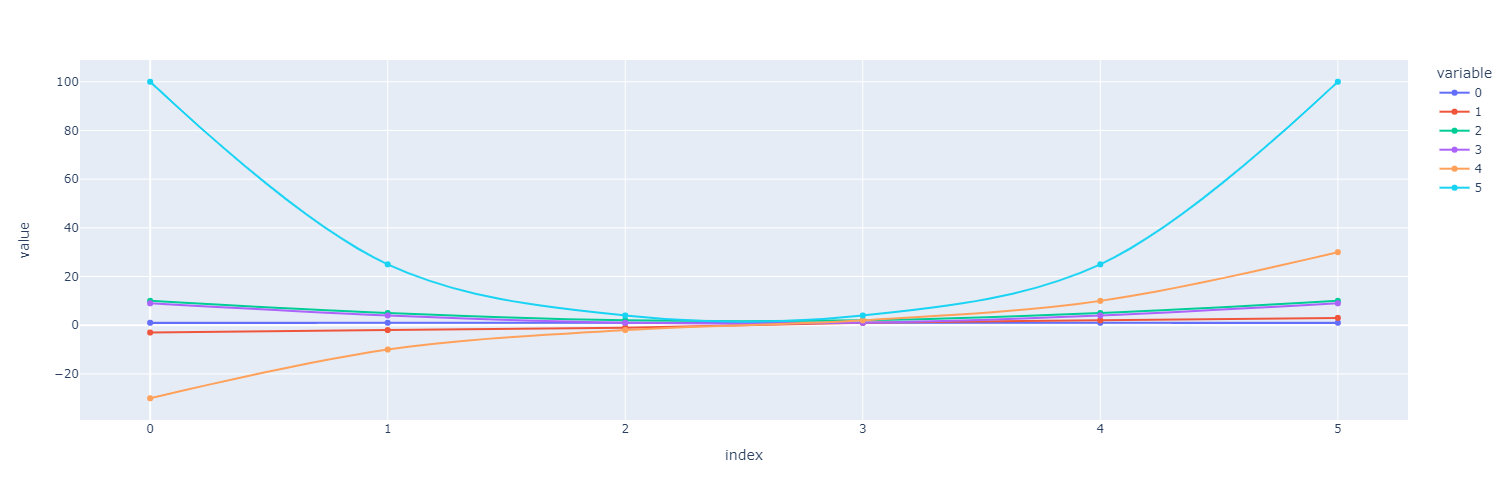

In [87]:
px.line(ddt,line_shape='spline',width=800,height=500,markers=True)

In [89]:
poly = PolynomialFeatures(3)
ddt = poly.fit_transform(dd)

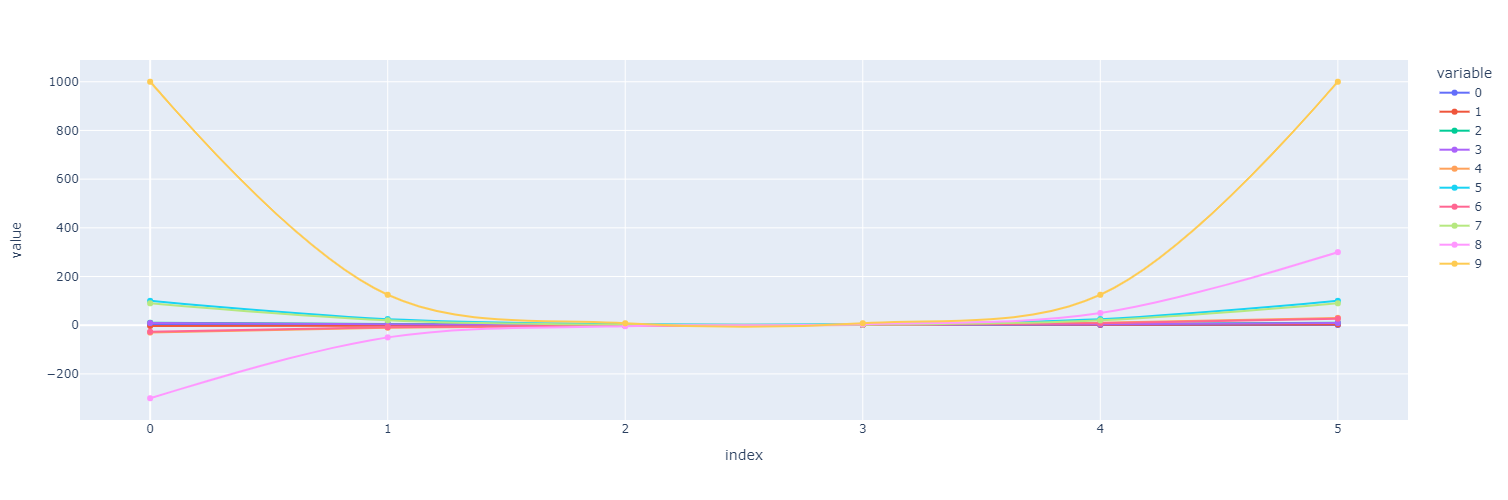

In [90]:
px.line(ddt,line_shape='spline',width=800,height=500,markers=True)

In [88]:
ddt

array([[  1.,  -3.,  10.,   9., -30., 100.],
       [  1.,  -2.,   5.,   4., -10.,  25.],
       [  1.,  -1.,   2.,   1.,  -2.,   4.],
       [  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   2.,   5.,   4.,  10.,  25.],
       [  1.,   3.,  10.,   9.,  30., 100.]])